In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import numpy as np,matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as pyplot
import numpy as np,matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.pipeline import Pipeline

%matplotlib inline

In [14]:
from sklearn.datasets import load_boston

In [15]:
boston=load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [16]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [17]:
data = pd.DataFrame(boston.data,columns = boston.feature_names)
data['target']= boston.target

In [18]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [35]:
scaler = StandardScaler()
scaler.fit(data.drop('target',axis=1))
scaled_data = scaler.transform(data.drop('target',axis=1))
# data_new_df = pd.DataFrame(scaled_features,columns = data.drop('target',axis=1).columns)
# data_new_df.head()
scaled_data.shape

(506, 13)

In [85]:
x_train, x_test, y_train, y_test = train_test_split(scaled_data,data['target'],test_size=0.2,train_size=0.8)
validation_scores = {}
for degree in range(1,7,1):
  PolyDegree = PolynomialFeatures(degree= degree, include_bias = False, interaction_only = True)
  data_new= PolyDegree.fit_transform(x_train)
  model= LinearRegression()
  validation_score = cross_val_score(model,data_new,y_train, cv=4, scoring = 'neg_mean_squared_error').mean()
  validation_scores[degree] = -validation_score
  # data_new.shape
# data_new_df = pd.DataFrame(data_new,columns= ["bias","CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])
# data_new_df.head()

In [86]:
print(validation_scores)

#best MSE Error when degree = 2

{1: 24.143720606019816, 2: 14.523810721028191, 3: 81037.44971766754, 4: 4527.754500903928, 5: 3977.9972025356865, 6: 6932.9635606296415}


In [87]:
PolyDegree = PolynomialFeatures(degree= 2, include_bias = False, interaction_only = True)
data_new= PolyDegree.fit_transform(x_train)
x_test_transformed = PolyDegree.fit_transform(x_test)
model= LinearRegression()
model.fit(data_new, y_train)
model.score(x_test_transformed, y_test)

0.7391179699496955

In [103]:
validation_score_reg = []
training_score_reg = []
for lambdda in np.arange(0, 20, step=0.005):
  Reg_model= Ridge(alpha=lambdda)
  validation_score = cross_val_score(Reg_model,data_new,y_train, cv=4, scoring = 'neg_mean_squared_error').mean()
  validation_score_reg.append(-validation_score)
  # training_score_reg[lambdda] = mean_squared_error(y_train, Reg_model.predict(data_new))

In [104]:
print(validation_score_reg)

[14.523810721046578, 14.795970138416141, 14.85544132250988, 14.865131036089377, 14.856726419696717, 14.839696837050349, 14.817900560344524, 14.79323257963171, 14.766748017068013, 14.739089174169283, 14.710673520850694, 14.681786033691388, 14.652628604967848, 14.62334836625616, 14.594054869853785, 14.564831013937582, 14.535740270351926, 14.506831629602253, 14.478143082328744, 14.449704131315528, 14.421537642732659, 14.393661235617742, 14.366088341506199, 14.33882902380811, 14.311890619165478, 14.285278244867634, 14.258995204110033, 14.233043312375635, 14.207423162248752, 14.182134339688933, 14.157175601702313, 14.132545023055266, 14.108240117987862, 14.084257941590302, 14.060595174550798, 14.037248194218364, 14.014213134347212, 13.991485935447393, 13.969062387288002, 13.946938164834759, 13.925108858664846, 13.903570000726054, 13.882317086155373, 13.861345591758361, 13.840650991644189, 13.820228770441599, 13.800074434444621, 13.780183520989699, 13.760551606315346, 13.741174312121643, 13.

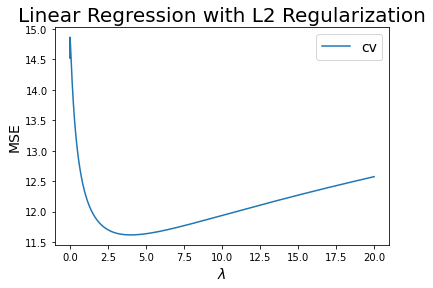

In [106]:
    plt.plot(np.arange(0, 20, step=0.005), validation_score_reg, label="cv")
    # plt.plot(lambdas, test_errors, label="cv")
    plt.xlabel("$\\lambda$", fontsize=14)
    plt.ylabel("MSE", fontsize=14)
    plt.title("Linear Regression with L2 Regularization", fontsize=20)
    plt.legend(fontsize=14)
    plt.show()

In [109]:
min_MSE = np.min(np.array(validation_score_reg))
best_lambda = np.arange(0, 20, step=0.005)[np.argmin(np.array(validation_score_reg))]
# np.arange(0, 20, step=0.005)[np.where(np.array(validation_score_reg))]

print(f"Min MSE = {min_MSE} at lambda = {best_lambda}")

Min MSE = 11.617763714860214 at lambda = 4.005
